In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

<!-- TEASER_END -->

In [180]:
Ndim = 1
a=1
b=10
Nsamples = 5000000
Nskip = 0

def f(x):
    return np.sin(x)/x#np.exp(-(x-3.14)**2)# 10*np.exp(-x)-1#np.exp(-(x-3.14)**2)#np.sin(x)/x #np.exp(-x)

#def f(x):
#    res = 1
#    for v in x:
#        res*=np.sin(v)/v
#    return res

def gen():
    return a+(b-a)*np.random.random(Ndim)##a+(b-a)*np.random.randn()

integral1 = 0
integral2 = 0
integral = 0
#sample = np.empty((0,Ndim))
#ints = np.empty((0,Ndim))
sample=[]
ints=[]


last = gen()
flast = np.abs(f(last))
for i in range(Nsamples):
    g=last+0.3*(np.random.random(1)[0]-0.5)#gen()#last+0.1*np.random.random(1)[0]-0.05#gen()
    #if g>b or g<a:
    #    g=5
        
    fnew = np.abs(f(g))
    accept = False
    if (fnew>flast):
        accept = True
    else:
        p=np.random.random()
        if p<fnew/flast: accept = True
    if accept:
        flast = fnew
        last = g
        
    if i>Nskip:
        integral += 1/f(last)
        if (f(last)>0):
            integral1+=1/flast#abs(np.sin(last))/f(last)
            ints.append(1/flast)
        else : 
            integral2+=1/flast
            ints.append(-1/flast)
        
    #ints=np.vstack((ints,1/f(last)))
    #sample=np.vstack((sample,last)) 
    
    sample.append(last)
    
sample=np.array(sample)
ints=np.array(ints)

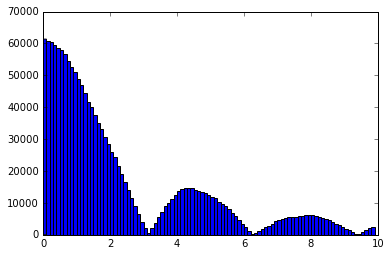

In [181]:
_=plt.hist(sample,bins=np.arange(0,10,.1),normed=False)#weights=np.zeros_like(sample)+1.0/Nsamples)

In [182]:
#_=plt.hist(ints[:,0],bins=np.arange(0,10,.1),normed=True)

In [183]:
np.sum(sample/Nsamples)

-14.163118242106993

In [184]:
print((b-a)/(integral1-integral2)*(Nsamples-Nskip))

[-5.18630182]


In [185]:
print((b-a)/(integral)*(Nsamples-Nskip))

[-5.18630182]


In [186]:
print(integral1,integral2,integral)

(array([ 67170022.46513231]), array([ 75846725.35125721]), array([-8676702.88612142]))


In [187]:
r=np.cumsum(ints[Nskip:])/np.arange(1,len(ints[Nskip:])+1,1)

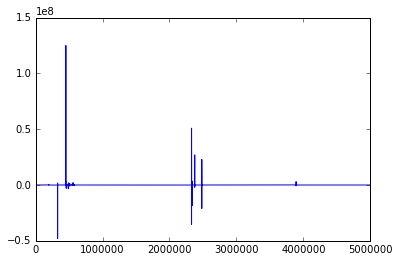

In [188]:
plt.plot((b-a)/r)
#plt.ylim(0,100)

In [189]:
def f2(x):
    return abs(f(x))

#integrate.quad(f2,a,b)[0]/integrate.quad(f,a,b)[0]
integrate.quad(f,a,b)

(0.712264523851691, 1.7922427712295214e-14)

In [197]:
def t(x):
    print(x)

def l(x):
    print(x)

def calc(f,f2):
    y=f(4)
    print(y)
    f2(7)
    
calc(lambda x: x+2,l)

6
7


In [210]:
Ndim = 1
a=0
b=10



def gen(xlast):
    return xlast+0.5*np.random.randn(Ndim)[0]#a+(b-a)*np.random.random(Ndim)[0]

def calc(fcalc, fprob):
    integral1 = 0
    integral2 = 0
    integral = 0
    #s=[]   
    #ints = []
    last = gen(b/2)
    flast = np.abs(fprob(last))
    for i in range(Nsamples):
        g=gen(last)
        fnew = np.abs(fprob(g))
        accept = False
        if g>a and g<b:
            if (fnew>=flast):
                accept = True
            else:
                p=np.random.random()
                if p<fnew/flast: accept = True
        if accept:
            flast = fnew
            last = g
        #s.append(last)    
        #ints.append(fcalc(last))
        if i>Nskip:
            integral += fcalc(last)
            if (f(last)>0):
                integral1+=fcalc(last)
            else : 
                integral2+=fcalc(last)
    #print(plt.hist(s))
    result = (integral1 - integral2)/(Nsamples-Nskip)
    #print(result)
    return result

In [211]:
calc(f, lambda x:x)

0.12703507425152941

In [213]:
import math

def f(x):
    return abs(np.sin(x)/x)#x**2#b-x#np.exp(-(x-3.14)**2)# 10*np.exp(-x)-1#np.exp(-(x-3.14)**2)#np.sin(x)/x #np.exp(-x)


Nsamples = 1000000
Nskip = 10000

def estimate(N):
    acc = 1
    p = 1./2
    for i in range(N):
        s=calc(lambda x: math.pow(f(x),p), lambda x: math.pow(f(x), p))
        #print(s)
        acc*=s
        p/=2
    sN=calc(lambda x: math.pow(f(x),p),lambda x: 1)*(b-a)
    #print(sN)
    return acc*sN

r = []
for i in range(10):
    print('Estimating with %d terms' % i)
    res = estimate(i)
    r.append(res)
    print('Result = ',res)
    
#r = []
#for i in range(10):
#    r.append(estimate())
    
plt.plot(r)
#print(np.mean(r))

Estimating with 0 terms
('Result = ', 4.3346242690765955)
Estimating with 1 terms
('Result = ', 3.7618206084883505)
Estimating with 2 terms
('Result = ', 3.159993862187597)
Estimating with 3 terms
('Result = ', 2.836192052078375)
Estimating with 4 terms


KeyboardInterrupt: 

Estimating with 0 terms
('Result = ', 4.350699967999149)
Estimating with 1 terms
('Result = ', 3.6957350156146997)
Estimating with 2 terms
('Result = ', 3.19412281380784)
Estimating with 3 terms
('Result = ', 2.8814691924565543)
Estimating with 4 terms
('Result = ', 2.7194848293988234)
Estimating with 5 terms
('Result = ', 2.6313578028154714)
Estimating with 6 terms
('Result = ', 2.606913511346975)
Estimating with 7 terms
('Result = ', 2.5865800928790446)
Estimating with 8 terms
('Result = ', 2.5703383038836667)
Estimating with 9 terms
('Result = ', 2.5539154640681128)
Estimating with 10 terms
('Result = ', 2.564072972827528)
Estimating with 11 terms
('Result = ', 2.5611439341682467)
Estimating with 12 terms
('Result = ', 2.5536300798254565)
Estimating with 13 terms
('Result = ', 2.556321410585232)
Estimating with 14 terms
('Result = ', 2.5530032170331975)
Estimating with 15 terms
('Result = ', 2.552874314328887)
Estimating with 16 terms
('Result = ', 2.5582799646815135)
Estimating with 17 terms
('Result = ', 2.549304772355493)
Estimating with 18 terms
('Result = ', 2.5738533970946764)
Estimating with 19 terms
('Result = ', 2.5572713239018126)
Estimating with 20 terms
('Result = ', 2.550902030046513)
Estimating with 21 terms
('Result = ', 2.550440112828877)
Estimating with 22 terms
('Result = ', 2.554239727508536)
Estimating with 23 terms
('Result = ', 2.55295791182978)
Estimating with 24 terms
('Result = ', 2.561261516084144)
Estimating with 25 terms
('Result = ', 2.560645641416264)
Estimating with 26 terms
('Result = ', 2.552406878892394)
Estimating with 27 terms
('Result = ', 2.5461603215007256)
Estimating with 28 terms
('Result = ', 2.5681399537980707)
Estimating with 29 terms
('Result = ', 2.5499136125172677)

In [172]:
def f2(x):
    return math.pow(f(x),1./2)

integrate.quad(f,a,b)

(2.5587469558318094, 2.8739263413513072e-08)

2.57448168795


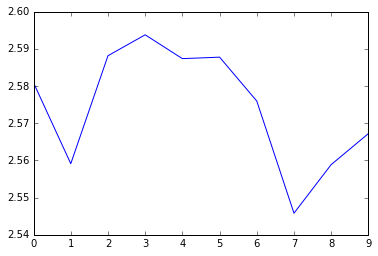

In [187]:
Nsamples = 10000
#estimate(100) 

r = []
for i in range(10):
    r.append(estimate(i))
    
plt.plot(r)
print(np.mean(r))

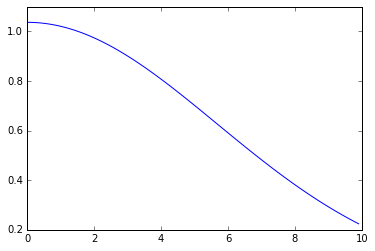

In [88]:
x=np.arange(a,b,0.1)
plt.plot(x,np.power(f(x),1./64))

In [115]:
t=calc(lambda x: math.pow(f(x),1./64),lambda x: math.pow(f(x), 1./64))

0.786160728305


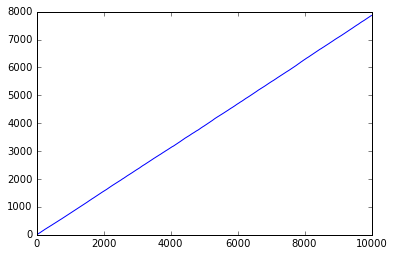

In [117]:
plt.plot(np.cumsum(t))

In [119]:
np.cumsum(t)

array([  5.71047158e-01,   1.60458342e+00,   2.63811968e+00, ...,
         7.86030568e+03,   7.86129054e+03,   7.86217833e+03])

In [ ]:
import math

def f(x):
    return abs(np.sin(x)/x)#x**2#b-x#np.exp(-(x-3.14)**2)# 10*np.exp(-x)-1#np.exp(-(x-3.14)**2)#np.sin(x)/x #np.exp(-x)


Nsamples = 100000

def estimate(N):
    acc = 1
    p = 1./2
    for i in range(N):
        s=calc(lambda x: math.pow(f(x),p), lambda x: math.pow(f(x), 1./2))
    s1=calc(lambda x: math.pow(f(x),1./2), lambda x: math.pow(f(x), 1./2))
    s2=calc(lambda x: math.pow(f(x),1./4), lambda x: math.pow(f(x), 1./4))
    s3=calc(lambda x: math.pow(f(x),1./8), lambda x: math.pow(f(x), 1./8))
    s4=calc(lambda x: math.pow(f(x),1./16),lambda x: math.pow(f(x), 1./16))
    s5=calc(lambda x: math.pow(f(x),1./32),lambda x: math.pow(f(x), 1./32))
    s6=calc(lambda x: math.pow(f(x),1./64),lambda x: math.pow(f(x), 1./64))
    sN=calc(lambda x: math.pow(f(x),1./128),lambda x: 1)*(b-a)
    return s1*s2*s3*s4*s5*s6*sN
#print(s1,s2,s3,s4,s5,s6,sN)
#print(s1*s2*s3*s4*s5*s6*sN)


estimate()        
#r = []
#for i in range(10):
#    r.append(estimate())
    
#plt.hist(r)
#print(np.mean(r))

In [110]:
Ndim = 10
a=0
b=2*3.142



def gen(xlast):
    return (xlast+0.5*np.random.randn(Ndim)) % b#a+(b-a)*np.random.random(Ndim)#xlast+0.5*np.random.randn(Ndim)#a+(b-a)*np.random.random(Ndim)[0]

def calc(fcalc, fprob, retValue):
    integral1 = 0
    integral2 = 0
    integral = 0
    s=[]   
    ints = []
    last = gen(b/2)
    flast = np.abs(fprob(last))
    for i in range(Nsamples):
        g=gen(last)
        fnew = np.abs(fprob(g))
        accept = False
        if True:#g>a and g<b:
            if (fnew>=flast):
                accept = True
            else:
                p=np.random.random()
                if p<fnew/flast: accept = True
        if accept:
            flast = fnew
            last = g
        #   
        
        if i>Nskip:
            if not retValue:
                ints.append(fcalc(last))
                s.append(last) 
            integral += fcalc(last)
            if (fcalc(last)>0):
                integral1+=fcalc(last)
            else : 
                integral2+=fcalc(last)
    #print(plt.hist(s))
    result = (integral1 - integral2)/(Nsamples-Nskip)
    #print(result)
    if retValue:
        return result
    else:
        return np.array(s),np.array(ints)
    #return result

import math

def fN(x):
    return np.prod(abs(np.sin(x)/x))#x**2#b-x#np.exp(-(x-3.14)**2)# 10*np.exp(-x)-1#np.exp(-(x-3.14)**2)#np.sin(x)/x #np.exp(-x)


Nsamples = 2000000
Nskip = 50000

def estimate(N):
    acc = 1
    p = 1./2
    for i in range(N):
        s=calc(lambda x: math.pow(fN(x),p), lambda x: math.pow(fN(x), p),True)
        print(s)
        acc*=s
        p/=2
    sN=calc(lambda x: math.pow(fN(x),p),lambda xN: 1,True)*math.pow(b-a,Ndim)
    print(sN)
    return acc*sN


In [113]:
p=1./2
s,t=calc(lambda x: math.pow(fN(x),p), lambda x: math.pow(fN(x), p),False)

In [114]:
np.sum(t)/len(t)

0.019226480539582889

(0.01, 0.03)

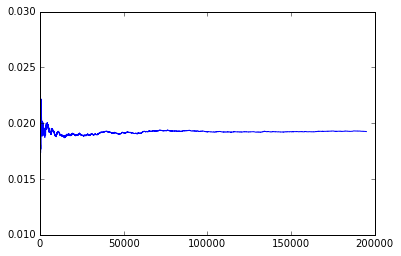

In [115]:
nt=np.array(t)
nt=nt[np.arange(1,len(nt),10)]
plt.plot(np.cumsum(nt)/np.arange(1,len(nt)+1,1))
plt.ylim(0.01,0.03)

In [116]:
np.sum(nt)/len(nt)

0.019253392289251787

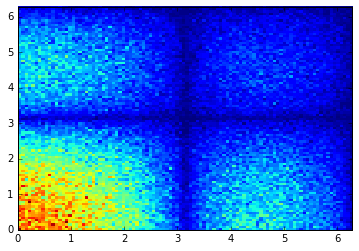

In [ ]:
_=plt.hist2d(s[np.arange(1,len(s),10),0],s[np.arange(1,len(s),10),1],bins=100)

In [ ]:
#_=plt.acorr(t,maxlags=30)

In [112]:
%time estimate(15)

0.0191995099713
0.0644727065167
0.199005118924
0.415770139706
0.632300584637
0.791295235792
0.888334378688
0.942217829265
0.970594097854
0.985169157919
0.992553044927
0.996265959674
0.998130532991
0.99906527447
0.999532169868
95997520.6403
CPU times: user 15min 12s, sys: 4.82 s, total: 15min 17s
Wall time: 15min 41s


3880.5115485611723

In [269]:
fN([0.001,0.001])

0.99999966666671103

In [32]:
def f(x):
    return abs(np.sin(x)/x)
def sqrtf(x):
    return np.sqrt(abs(np.sin(x)/x))
pi=3.14159

print(integrate.quad(f, 0, 2*pi))
print(integrate.quad(sqrtf, 0, 2*pi))

(2.2857225278278213, 2.531308496145357e-14)
(3.3933210448422497, 2.770902884918769e-08)


In [34]:
math.pow(2.2857225278278213/3.3933210448422497,Ndim)

0.01923027882853489

In [292]:
def f2(x,y):
    return abs(np.sin(x)/x)*abs(np.sin(y)/y)
pi=3.14159

integrate.dblquad(f2, 0, 2*pi, lambda x:0, lambda x:2*pi)[0]

5.224527474219604

In [305]:
def f(x1,x2,x3,x4,x5):
    return  abs(np.sin(x1)/x1)*abs(np.sin(x2)/x2)*abs(np.sin(x3)/x3)*abs(np.sin(x4)/x4)*abs(np.sin(x5)/x5)
integrate.nquad(f, [[0, 2*pi],[0, 2*pi],[0, 2*pi],[0, 2*pi],[0, 2*pi]])

KeyboardInterrupt: 

In [328]:
math.pow(math.sqrt(5.224527474219604),10)

3892.5579493175665

In [49]:
-.4 % 3

2.6